In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
def get_human_dataset( ):
    feature_name_df = pd.read_csv('E:/data/human_activity/features.txt',sep='\s+',
    header=None,names=['column_index','column_name'])
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    X_train = pd.read_csv('E:/data/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('E:/data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    y_train = pd.read_csv('E:/data/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('E:/data/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

C:\Users\YDH\Anaconda3\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(dt_clf.get_params())

0.8547675602307431
{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 156, 'splitter': 'best'}


In [3]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[6,8,10,12,16,20,24]}
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv=5, verbose = 1)
grid_cv.fit(X_train,y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  3.5min finished
0.8525571273122959
{'max_depth': 8}


In [1]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

NameError: name 'pd' is not defined

In [5]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print(depth , accuracy)

6 0.8557855446216491
8 0.8707159823549372
10 0.8673227010519172
12 0.8646080760095012
16 0.8574821852731591
20 0.8547675602307431
24 0.8547675602307431


In [6]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.2min finished
0.8550054406964092
{'max_depth': 8, 'min_samples_split': 16}


In [7]:
best_df_clf = grid_cv.best_estimator_

pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print(accuracy)

0.8717339667458432


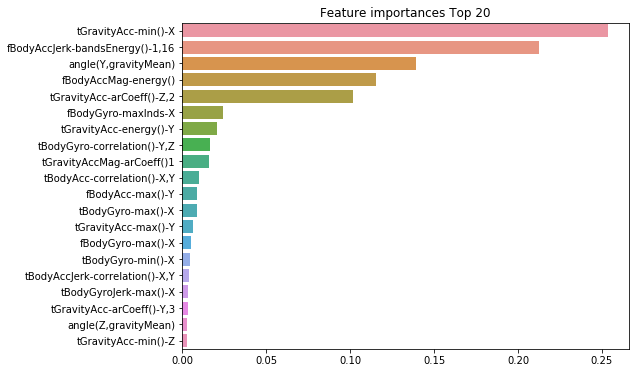

In [8]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()